In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [34]:
df = pd.read_csv('fer2013.csv')
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [35]:
train = df[df.Usage=='Training']
x_train = train['pixels']
y_train = train['emotion']
test = df[df.Usage=='PrivateTest']
x_test = test['pixels']
y_test = test['emotion']

In [36]:
new_x_train = []
for data in x_train:
    splited_data =  list(map(int,data.split()))
    new_x_train.append(splited_data)

new_x_test = []
for data in x_test:
    splited_data =  list(map(int,data.split()))
    new_x_test.append(splited_data)

# PCA with all features

In [5]:
pca = PCA(n_components=2304)
X_pca = pca.fit_transform(new_x_train)

In [6]:
print(pca.explained_variance_)

[2.66218450e+06 9.02562303e+05 8.70360713e+05 ... 4.05537675e+00
 4.01708190e+00 3.67712297e+00]


In [7]:
 pca.explained_variance_ratio_

array([2.89238925e-01, 9.80608783e-02, 9.45622653e-02, ...,
       4.40605380e-07, 4.36444751e-07, 3.99509161e-07])

<Figure size 432x288 with 0 Axes>

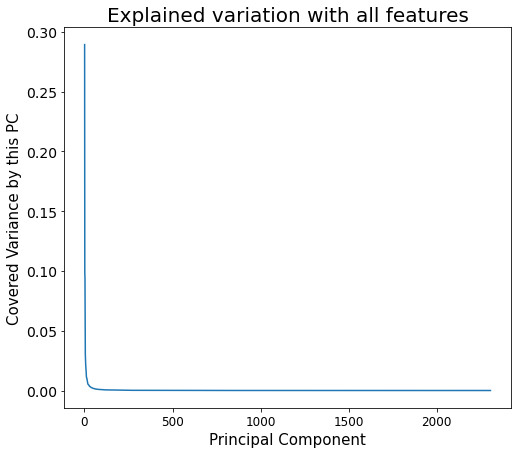

Explained variation per principal component for the first four PCs: [0.28923892 0.09806088 0.09456227 0.05485086]


In [19]:
xs = np.array(range(1,2305))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation with all features",fontsize=20)
plt.show()
print('Explained variation per principal component for the first four PCs: {}'.format(pca.explained_variance_ratio_[0:4]))

Text(0.5, 1.0, 'cumulative variance with all features')

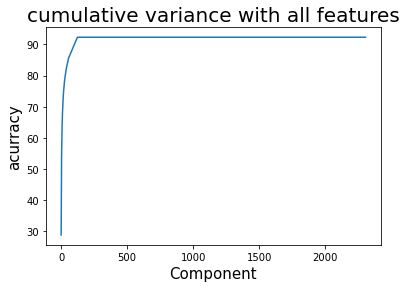

In [20]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot(var)
plt.xlabel('Component',fontsize=15)
plt.ylabel('acurracy',fontsize=15)
plt.title("cumulative variance with all features",fontsize=20)

# PCA with 150 features

In [26]:
pca_150 = PCA(n_components=150)
X_pca_150 = pca_150.fit_transform(new_x_train)
X_train_reduced = pca_150.transform(new_x_train)
X_test_reduced = pca_150.transform(new_x_test)

<Figure size 432x288 with 0 Axes>

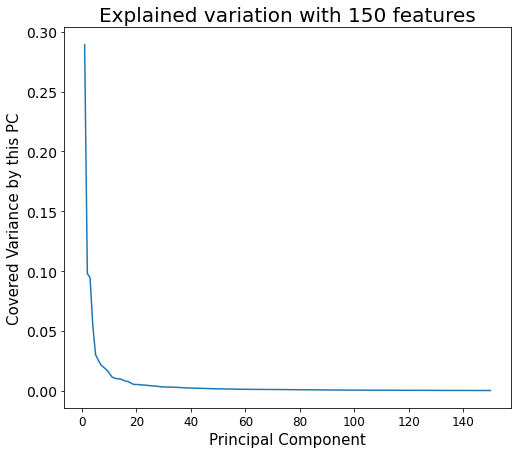

Explained variation per principal component for the first four PCs: [0.28923892 0.09806088 0.09456227 0.05485086]


In [22]:
xs = np.array(range(1,151))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca_150.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation with 150 features",fontsize=20)
plt.show()
print('Explained variation per principal component for the first four PCs: {}'.format(pca_150.explained_variance_ratio_[0:4]))

Text(0.5, 1.0, 'cumulative variance with 150 features')

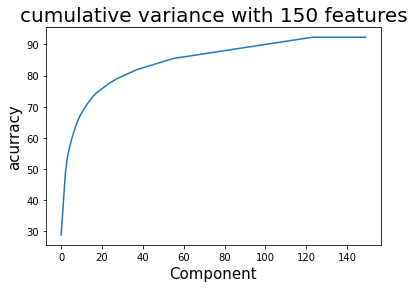

In [21]:
var=np.cumsum(np.round(pca_150.explained_variance_ratio_, decimals=3)*100)
plt.plot(var)
plt.xlabel('Component',fontsize=15)
plt.ylabel('acurracy',fontsize=15)
plt.title("cumulative variance with 150 features",fontsize=20)

# knn

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [25]:
def KNN_CLASSIFIER(x_train , y_train, x_test , y_test ,k):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(x_train , y_train) 
    pred = clf_knn.predict(x_test)
    score = accuracy_score(pred, y_test)
    print("accuracy score on test data for : {}".format(score))
    cm = confusion_matrix(pred,  y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


accuracy score on test data for : 0.40484814711618833


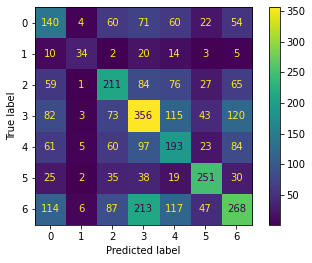

In [27]:
KNN_CLASSIFIER(new_x_train , y_train, new_x_test , y_test ,1)

accuracy score on test data for : 0.3485650599052661


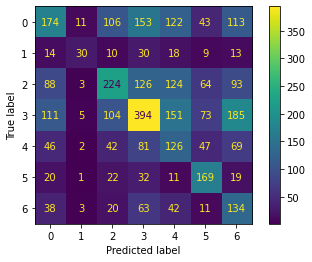

In [28]:
KNN_CLASSIFIER(new_x_train , y_train, new_x_test , y_test ,2)

accuracy score on test data for : 0.4106993591529674


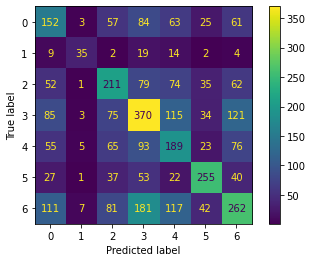

In [29]:
KNN_CLASSIFIER(X_train_reduced , y_train, X_test_reduced , y_test ,1)

accuracy score on test data for : 0.3502368347729172


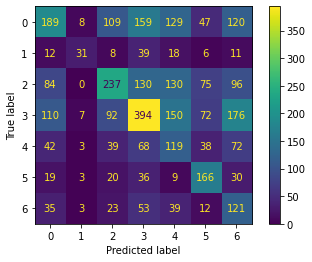

In [30]:
KNN_CLASSIFIER(X_train_reduced , y_train, X_test_reduced , y_test ,2)

# best number of componants pca

In [37]:
for n in range(1,10):
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(new_x_train , y_train) 
    pred = clf_knn.predict(new_x_test)
    score = accuracy_score(pred, y_test)
    print("accuracy score on test data with n={} for : {}".format(n ,score))

accuracy score on test data with n=1 for : 0.40484814711618833
accuracy score on test data with n=2 for : 0.3485650599052661
accuracy score on test data with n=3 for : 0.3390916689885762
accuracy score on test data with n=4 for : 0.3337977152410142
accuracy score on test data with n=5 for : 0.3365840066870995
accuracy score on test data with n=6 for : 0.32711061577040956
accuracy score on test data with n=7 for : 0.32683198662580104
accuracy score on test data with n=8 for : 0.32460295346893286
accuracy score on test data with n=9 for : 0.32850376149345223
